In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Text Preprocessing
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')

from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

import spacy
nlp=spacy.load("en")

In [2]:
msg=pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [3]:
msg.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
msg.tail(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
msg.size

27860

In [6]:
msg=msg.drop(labels=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
msg.columns=["category","text"]

In [7]:
msg.head(3)

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [8]:
msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
category    5572 non-null object
text        5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


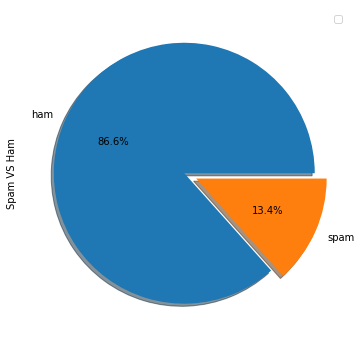

In [9]:
msg["category"].value_counts().plot(kind='pie',explode=[0,0.1],figsize=(6,6),autopct='%1.1f%%',shadow=True)
plt.ylabel("Spam VS Ham")
plt.legend(["Ham"], ["Spam"])
plt.show()

In [10]:
topMsg=msg.groupby("text")["category"].agg([len,np.max]).sort_values(by="len",ascending=False).head(n=10)
display(topMsg)

,len,amax
text,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!,4,spam
Okie,4,ham
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear""",4,ham


In [11]:
spam_msg=msg[msg["category"]=="spam"]["text"]
ham_msg=msg[msg["category"]=="ham"]["text"]

spam_words=[]
ham_words=[]

def extractSpamWords(spamMessages):
    global spam_words
    words=[word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam_words=spam_words+words
    
def extractHamWords(hamMessages):
    global ham_words
    words=[word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham_words=ham_words+words

x=spam_msg.apply(extractSpamWords)
y=ham_msg.apply(extractHamWords)

In [12]:
spam_words=np.array(spam_words)
print("Top 10 Spam words are :\n")
pd.Series(spam_words).value_counts().head(n=10)

Top 10 Spam words are :



call      346
free      217
txt       156
ur        144
u         144
mobile    123
text      121
stop      114
claim     113
reply     104
dtype: int64

In [13]:
ham_words=np.array(ham_words)
print("Top 10 ham words are :\n")
pd.Series(ham_words).value_counts().head(n=10)

Top 10 ham words are :



u       974
gt      318
lt      316
get     301
go      246
ok      246
got     242
ur      237
know    234
like    231
dtype: int64

In [14]:
msg["messageLength"]=msg["text"].apply(len)
msg["messageLength"].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: messageLength, dtype: float64

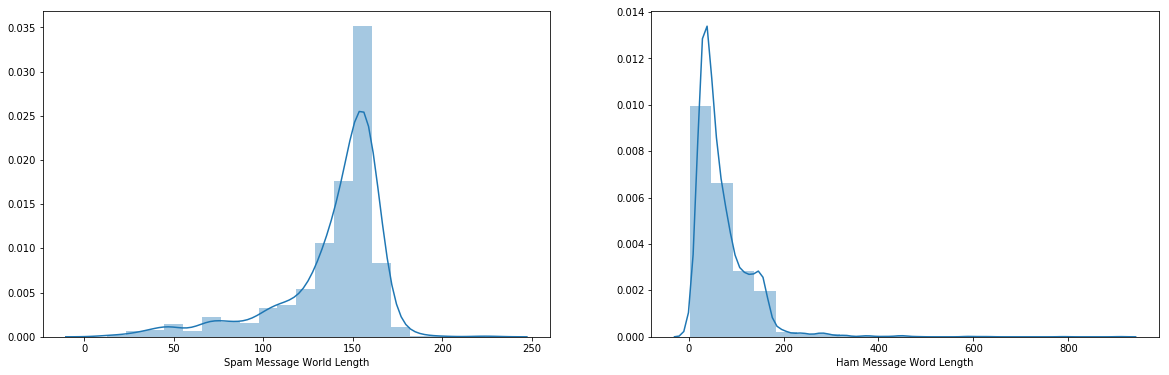

In [15]:
f, ax=plt.subplots(1, 2, figsize = (20, 6))

sns.distplot(msg[msg["category"]=="spam"]["messageLength"], bins = 20, ax = ax[0])
ax[0].set_xlabel("Spam Message World Length")

sns.distplot(msg[msg["category"]=="ham"]["messageLength"],bins = 20, ax = ax[1])
ax[1].set_xlabel("Ham Message Word Length")

plt.show()

In [16]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

def cleanText(message):
    message = message.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    
    return " ".join(words)

msg["text"]= msg["text"].apply(cleanText)
msg.head(n=10)

,category,text,messageLength
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri 2 wkli comp win fa cup final tkts 2...,155
3,ham,u dun say earli hor u c alreadi say,49
4,ham,nah dont think goe usf live around though,61
5,spam,freemsg hey darl 3 week word back id like fun ...,148
6,ham,even brother like speak treat like aid patent,77
7,ham,per request mell mell oru minnaminungint nurun...,160
8,spam,winner valu network custom select receivea å£9...,158
9,spam,mobil 11 month u r entitl updat latest colour ...,154


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec= TfidfVectorizer(encoding="latin-1", strip_accents="unicode",stop_words="english")
vec.fit(msg["text"])
features=vec.transform(msg["text"])
print(features.shape)


(5572, 7903)


In [18]:
def encodeCategory(cat):
    if cat == "spam":
        return 1
    else:
        return 0

msg["binary_category"]=msg["category"].apply(encodeCategory)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, msg["binary_category"], test_size = 0.2)

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, confusion_matrix

from sklearn.naive_bayes import MultinomialNB
gaussianNB = MultinomialNB()
gaussianNB.fit(X_train, y_train)

y_pred = gaussianNB.predict(X_test)

print(fbeta_score(y_test,y_pred, beta = 0.5))

print(confusion_matrix(y_test,y_pred))

0.8992805755395683
[[959   0]
 [ 56 100]]


In [20]:
y_test.index

Int64Index([3000,  405, 1451, 2237, 3075, 3630, 2828,  743, 2401,  481,
            ...
             156,  274, 4337, 4948, 3860, 1333, 3525, 2022, 2219, 1268],
           dtype='int64', length=1115)

In [22]:
msg.iloc[5240]['text'],y_test[3630],y_pred[0]

('gud gudk chikku tke care sleep well gud nyt', 0, 1)

In [23]:
message = input()
cleaned_word = cleanText(message)
X = vec.transform([cleaned_word])
y = gaussianNB.predict(X)
print('ham' if y[0]==0 else 'spam')

Hello friend, how are you?
ham
